In [1]:
from models import VariationalAutoencoder, Autoencoder
from data_utils import CustomImageDataset
import torch
import os
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt 
import numpy as np

plt.style.use("ggplot")

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using device:', device)

Using device: cuda


In [3]:
transform = transforms.Compose(
    [transforms.ToPILImage(),
     transforms.Resize((28, 28)),
     transforms.ToTensor(),
     transforms.Normalize(mean=(0), std=(1))])

In [4]:
proliv_data_path = "./homework_2_dataset/dataset/proliv"
proliv_dataset = CustomImageDataset(os.path.join(proliv_data_path, "annotation.txt"), os.path.join(proliv_data_path, "imgs"), transform=transform)
proliv_dataloader = DataLoader(proliv_dataset, batch_size=1, shuffle=True)

In [5]:
ne_proliv_data_path = "./homework_2_dataset/dataset/train"
ne_proliv_dataset = CustomImageDataset(os.path.join(ne_proliv_data_path, "annotation.txt"), os.path.join(ne_proliv_data_path, "imgs"), transform=transform)
ne_proliv_dataloader = DataLoader(ne_proliv_dataset, batch_size=1, shuffle=True)

In [6]:
ae = Autoencoder(16).to(device) # GPU
ae.load_state_dict(torch.load("./autoencoders/AE"))
ae.eval()

Autoencoder(
  (encoder): Encoder(
    (linear1): Linear(in_features=2352, out_features=512, bias=True)
    (linear2): Linear(in_features=512, out_features=16, bias=True)
  )
  (decoder): Decoder(
    (linear1): Linear(in_features=16, out_features=512, bias=True)
    (linear2): Linear(in_features=512, out_features=2352, bias=True)
  )
)

In [7]:
vae = VariationalAutoencoder(16).to(device) # GPU
vae.load_state_dict(torch.load("./autoencoders/VAE"))
vae.eval()

VariationalAutoencoder(
  (encoder): VariationalEncoder(
    (linear1): Linear(in_features=2352, out_features=512, bias=True)
    (linear2): Linear(in_features=512, out_features=16, bias=True)
    (linear3): Linear(in_features=512, out_features=16, bias=True)
  )
  (decoder): Decoder(
    (linear1): Linear(in_features=16, out_features=512, bias=True)
    (linear2): Linear(in_features=512, out_features=2352, bias=True)
  )
)

## Определения порога loss

### AE

In [8]:
proliv_dataloader_loss = 0
proliv_losses = []
with torch.no_grad():
    count = 0
    for x, y in proliv_dataloader:
        count += 1
        x = x.to(device) # GPU
        x_hat = ae(x)
        loss = ((x - x_hat)**2).sum()
        proliv_losses.append(loss.cpu())
        proliv_dataloader_loss += loss.item()

proliv_dataloader_loss / count

8.36150242446305

In [9]:
ne_proliv_losses = []
ne_proliv_dataloader_loss = 0
with torch.no_grad():
    count = 0
    for x, y in ne_proliv_dataloader:
        count += 1
        x = x.to(device) # GPU
        x_hat = ae(x)
        loss = ((x - x_hat)**2).sum()
        ne_proliv_losses.append(loss.cpu())
        ne_proliv_dataloader_loss += loss.item()

ne_proliv_dataloader_loss / count

0.7255064701020718

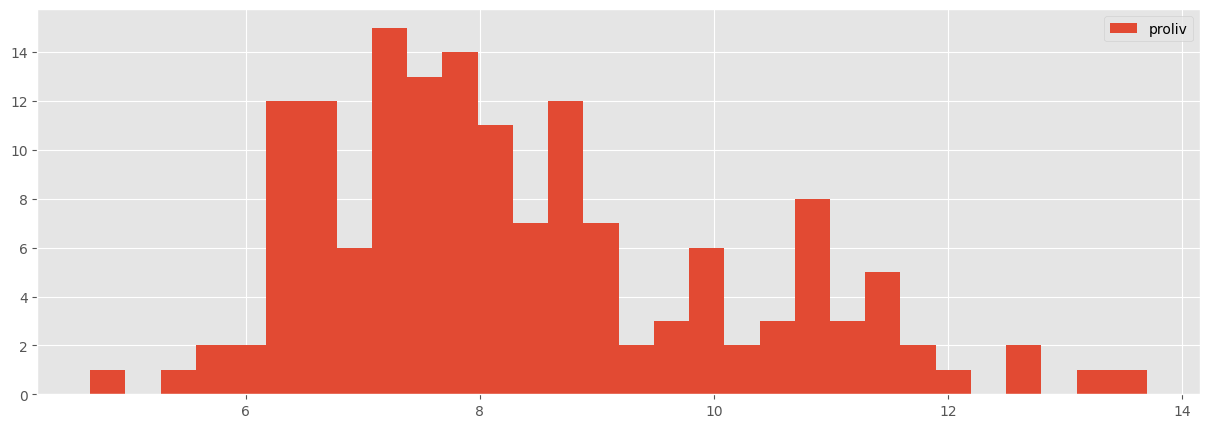

In [10]:
plt.figure(figsize=(15, 5))
plt.hist(proliv_losses, bins=30, label="proliv") 
plt.legend() 
plt.show()

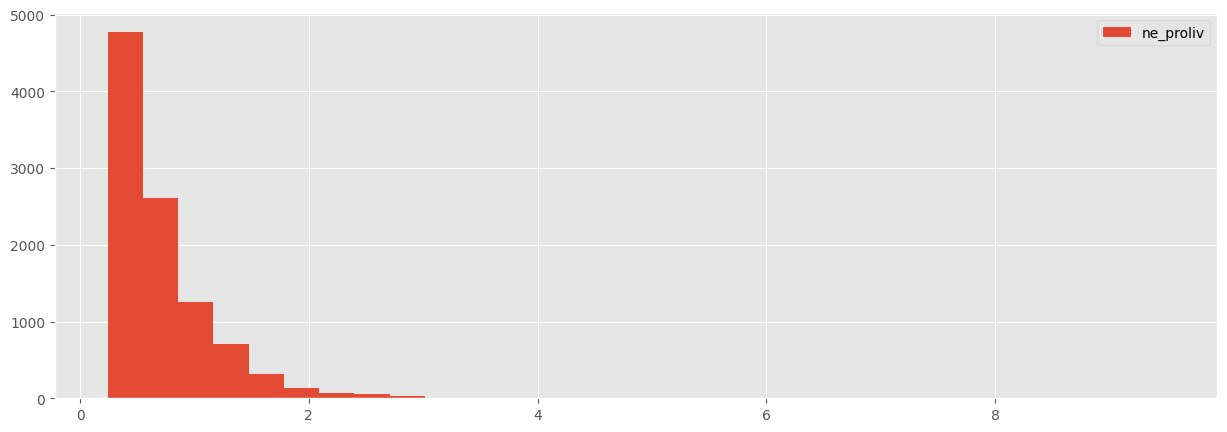

In [11]:
plt.figure(figsize=(15, 5))
plt.hist(ne_proliv_losses, bins=30, label="ne_proliv") 
plt.legend() 
plt.show()

In [12]:
print(f"MIN: {min(proliv_losses):.2f}, MAX: {max(proliv_losses):.2f}, MEAN: {(sum(proliv_losses) / len(proliv_losses)):.2f}, STD: {np.std(proliv_losses):.2f}")

MIN: 4.67, MAX: 13.70, MEAN: 8.36, STD: 1.76


In [13]:
print(f"MIN: {min(ne_proliv_losses):.2f}, MAX: {max(ne_proliv_losses):.2f}, MEAN: {(sum(ne_proliv_losses) / len(ne_proliv_losses)):.2f}, STD: {np.std(ne_proliv_losses):.2f}")

MIN: 0.24, MAX: 9.48, MEAN: 0.73, STD: 0.47


### VAE

In [14]:
proliv_dataloader_loss = 0
proliv_losses = []
with torch.no_grad():
    count = 0
    for x, y in proliv_dataloader:
        count += 1
        x = x.to(device) # GPU
        x_hat = vae(x)
        loss = ((x - x_hat)**2).sum()
        proliv_losses.append(loss.cpu())
        proliv_dataloader_loss += loss.item()

proliv_dataloader_loss / count

7.408936564024392

In [15]:
ne_proliv_dataloader_loss = 0
ne_proliv_losses = []
with torch.no_grad():
    count = 0
    for x, y in ne_proliv_dataloader:
        count += 1
        x = x.to(device) # GPU
        x_hat = vae(x)
        loss = ((x - x_hat)**2).sum()
        ne_proliv_losses.append(loss.cpu())
        ne_proliv_dataloader_loss += loss.item()

ne_proliv_dataloader_loss / count

0.6449120771661401

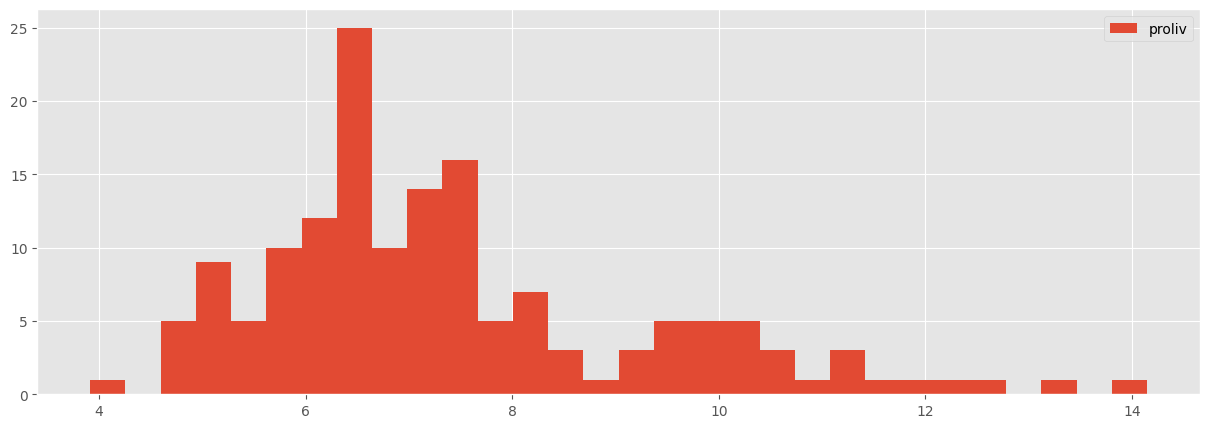

In [16]:
plt.figure(figsize=(15, 5))
plt.hist(proliv_losses, bins=30, label="proliv") 
plt.legend() 
plt.show()

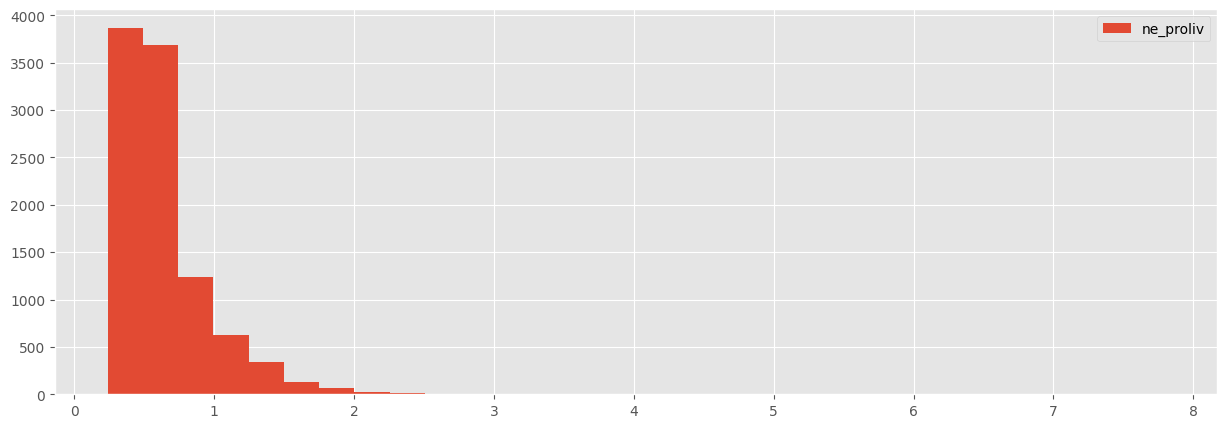

In [17]:
plt.figure(figsize=(15, 5))
plt.hist(ne_proliv_losses, bins=30, label="ne_proliv") 
plt.legend() 
plt.show()

In [19]:
print(f"MIN: {min(proliv_losses):.2f}, MAX: {max(proliv_losses):.2f}, MEAN: {(sum(proliv_losses) / len(proliv_losses)):.2f}, STD: {np.std(proliv_losses):.2f}")

MIN: 3.91, MAX: 14.15, MEAN: 7.41, STD: 1.89


In [18]:
print(f"MIN: {min(ne_proliv_losses):.2f}, MAX: {max(ne_proliv_losses):.2f}, MEAN: {(sum(ne_proliv_losses) / len(ne_proliv_losses)):.2f}, STD: {np.std(ne_proliv_losses):.2f}")

MIN: 0.24, MAX: 7.79, MEAN: 0.64, STD: 0.33
